# Plotting and Visualization

In [3]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [4]:
%matplotlib inline

In [5]:
%pwd

u'D:\\study\\Computer Science\\practice\\TestDrivenLearn\\Python\\TestPandas2\\pydata-book'

In [6]:
%cd ../book_scripts/

[Error 2] The system cannot find the file specified: u'../book_scripts/'
D:\study\Computer Science\practice\TestDrivenLearn\Python\TestPandas2\pydata-book


## Index
* [A brief matplotlib API primer](#A-brief-matplotlib-API-primer)
    * [Figures and Subplots](#Figures-and-Subplots)
        * [plt.subplots sample, which specifies figsize](#plt.subplots-sample,-which-specifies-the-figsize)
    * [Colors, markers, and line styles](#Colors,-markers,-and-line-styles)
    * [Ticks, labels, and legends](#Ticks,-labels,-and-legends)
        * [Set axis range](#Set-axis-range)
        * [Setting the title, axis labels, ticks, and ticklabels](#Setting-the-title,-axis-labels,-ticks,-and-ticklabels)
        * [Adding legends](#Adding-legends)
    * [Annotations and drawing on a subplot](#Annotations-and-drawing-on-a-subplot)
    * [Saving plots to file](#Saving-plots-to-file)
    * [matplotlib configuration](#matplotlib-configuration)
* [Plotting functions in pandas](#Plotting-functions-in-pandas)
    * [Line plots](#Line-plots)
    * [Bar plots](#Bar-plots)
    * [Histograms and density plots](#Histograms-and-density-plots)
        * [Plot multiple histogram](#Plot-multiple-histogram)
    * [Scatter plots](#Scatter-plots)
* [Plotting-Maps: Visualizing Haiti Earthquake Crisis data](#Plotting-Maps:-Visualizing-Haiti-Earthquake-Crisis-data)

## A brief matplotlib API primer

### Figures and Subplots
You can create a new figure with **plt.figure**. plt.figure has a number of options, notably **figsize** will guarantee the figure has a certain size and aspect ratio if saved to disk. figsize is a **(width,height)** tuple.

You can get a reference to the active figure using **plt.gcf()**.

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the <span style="color:red;font-weight:bold">last figure and subplot</span> used (creating one if necessary), thus hiding the figure and subplot creation

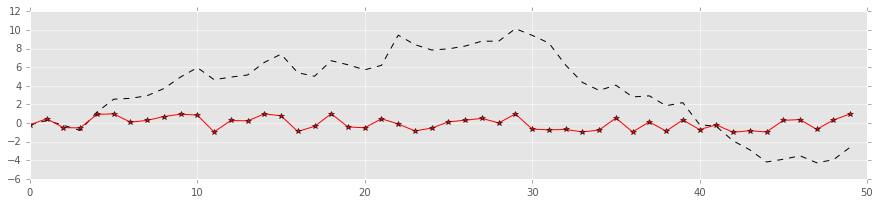

In [7]:
fig = plt.figure(figsize=(15, 3))
from numpy.random import randn
x = randn(50)
plt.plot(x.cumsum(), 'k--')
plt.plot(np.sin(x),"r*-")

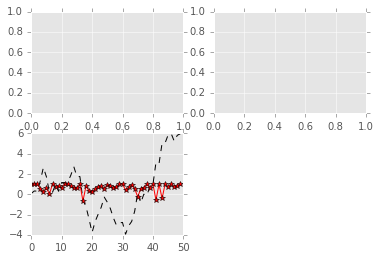

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# draw on the last subplot
x = randn(50)
plt.plot(x.cumsum(), 'k--')
plt.plot(np.cos(x),"r*-")

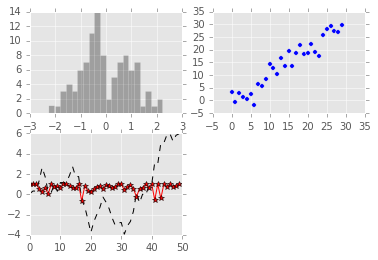

In [9]:
# draws on the last figure and subplot used (creating one if necessary)
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
fig # this line is extremely important. this line force a refresh and redraw to show the latest plot

In [10]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C256AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E19AB00>]], dtype=object)

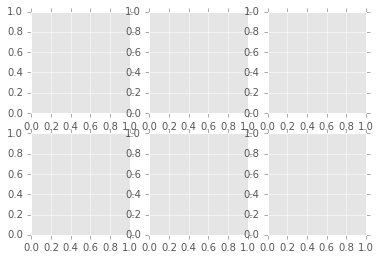

In [11]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots
wspace and hspace controls the **percent** of the figure width and figure height, respectively, to use as spacing between subplots. 

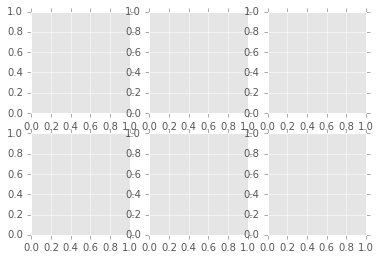

In [12]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,    wspace=0, hspace=0)
fig

#### plt.subplots sample, which specifies the figsize

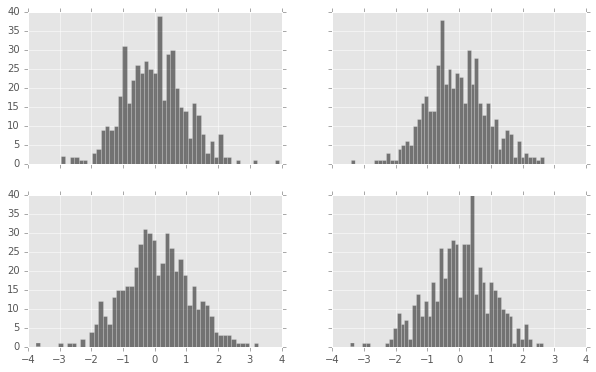

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(10,6))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

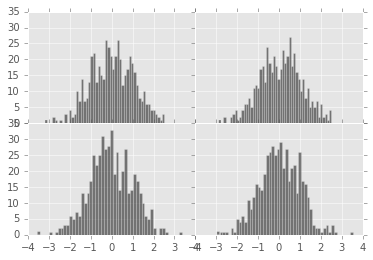

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles
You can see the full set of linestyles by looking at the **docstring for plot**.

style string, two styles:
* color followed by marker type and line style, like "bo--"
    1. 1st character: color
    2. 2nd character: marker type
    3. remaining: line style
    
* color followed by line style, like "r--" or "r-"

line style and marker share the same set of characters.

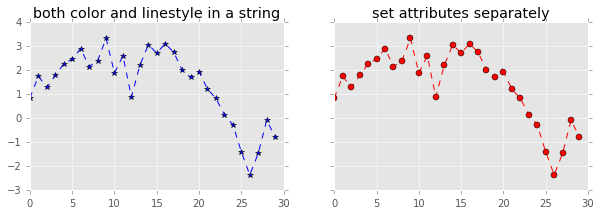

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,3))
a = randn(30)

axes[0].plot(a.cumsum(), 'b*--')
axes[0].set_title("both color and linestyle in a string")

axes[1].plot(a.cumsum(), color="r",marker="o",linestyle="--")
axes[1].set_title("set attributes separately")

In [16]:
plt.close('all')

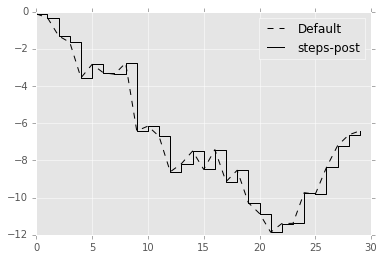

In [17]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Set axis range
two ways of setting axis range:
* by using function in plt
* by using method in axis object

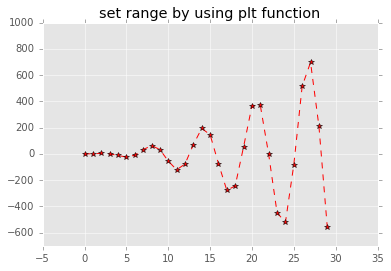

In [18]:
x = np.arange(30)
y = (x**2) * (np.sin(x))

# use the function in plt
fig = plt.figure()
plt.plot(x,y,"r*--")
plt.xlim(-5,35)
plt.ylim(-700,1000)
plt.title("set range by using plt function")

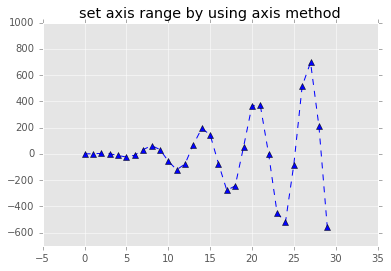

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x,y,"b^--")
ax.set_xlim(-5,35)
ax.set_ylim(-700,1000)
ax.set_title("set axis range by using axis method")

#### Setting the title, axis labels, ticks, and ticklabels
also two ways: 
* via axis object's method (eg. **ax.set_title**)
* via plt's function (eg. **plt.title**)

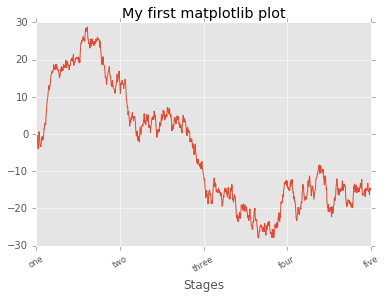

In [20]:
datas = randn(1000).cumsum()

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(datas)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

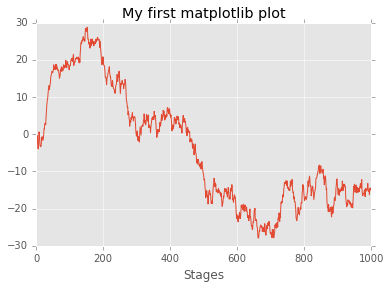

In [21]:
fig = plt.figure()
plt.plot(datas)
plt.title("My first matplotlib plot")
plt.xlabel("Stages")

#### Adding legends

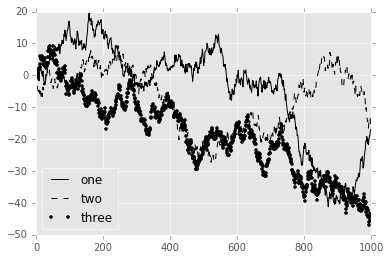

In [22]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

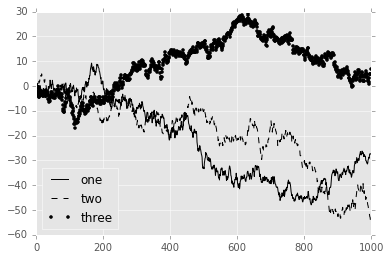

In [23]:
fig = plt.figure(); 
plt.plot(randn(1000).cumsum(), 'k', label='one')
plt.plot(randn(1000).cumsum(), 'k--', label='two')
plt.plot(randn(1000).cumsum(), 'k.', label='three')
plt.legend(loc='best')

### Annotations and drawing on a subplot

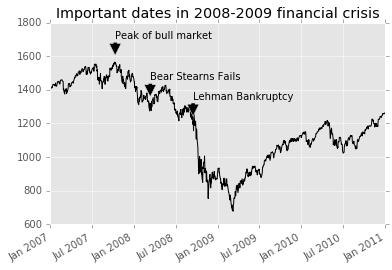

In [24]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

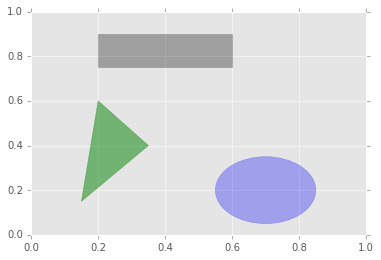

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

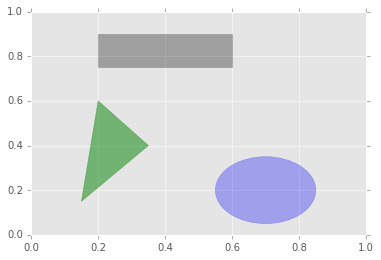

In [26]:
fig

In [27]:
fig.savefig('figpath.svg')

In [28]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [29]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [30]:
# plt.rc('figure', figsize=(10, 10))

## Plotting functions in pandas

### Line plots

In [31]:
plt.close('all')

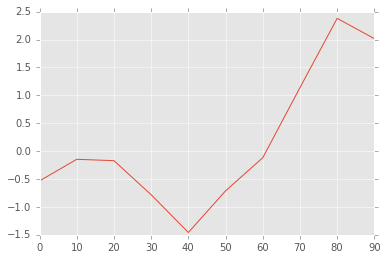

In [32]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object's **index is passed to matplotlib for plotting on the X axis**, though this can be disabled by passing **use_index=False**.

Most of pandas’s plotting methods accept an optional **ax parameter, which can be a matplotlib subplot object**.

DataFrame’s plot method plots **each of its columns** as a different line on the same subplot, creating a legend automatically

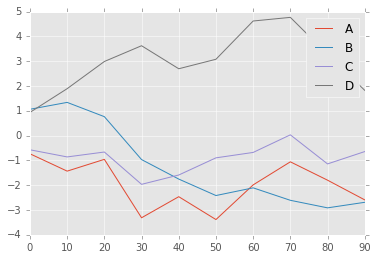

In [33]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

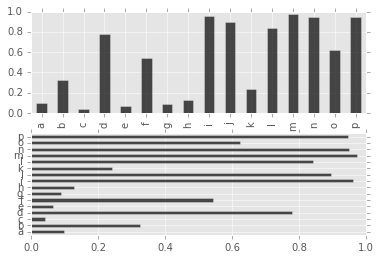

In [34]:
# plot on different axis objects
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [35]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.206712,0.807902,0.044054,0.959577
two,0.755580,0.557339,0.324264,0.696506
three,0.273267,0.320218,0.167184,0.530602
four,0.232669,0.726053,0.938643,0.794451
five,0.408229,0.846905,0.621344,0.583696
six,0.871978,0.206056,0.930686,0.607727


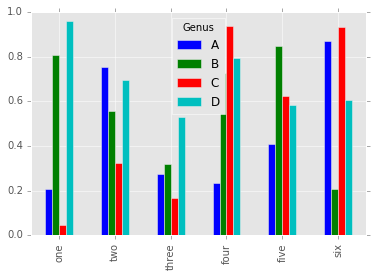

In [36]:
df.plot(kind='bar')

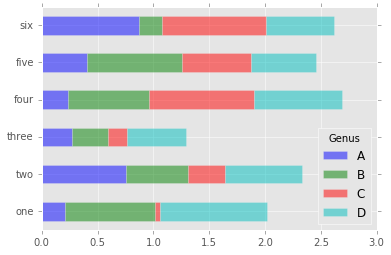

In [37]:
plt.figure()
df.plot(kind='barh', stacked=True, alpha=0.5)

In [38]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.party_size)
party_counts

party_size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [39]:
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]
party_counts

party_size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


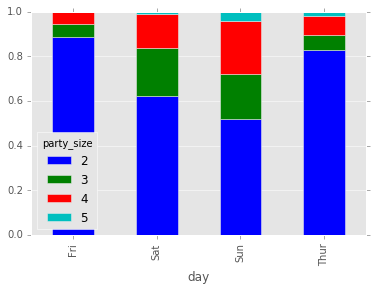

In [40]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

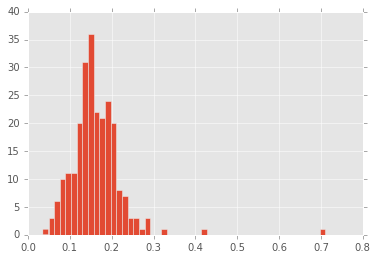

In [41]:
plt.figure()
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

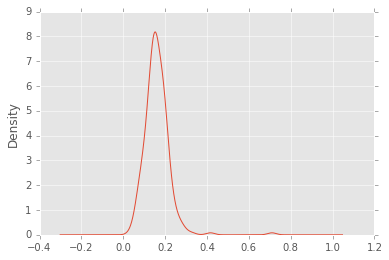

In [42]:
plt.figure()
tips['tip_pct'].plot(kind='kde')

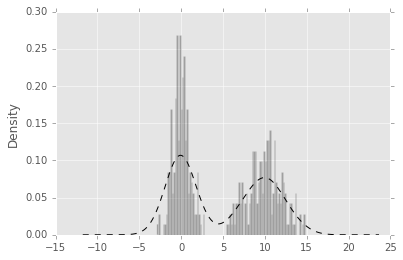

In [43]:
plt.figure()
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

#### Plot multiple histogram

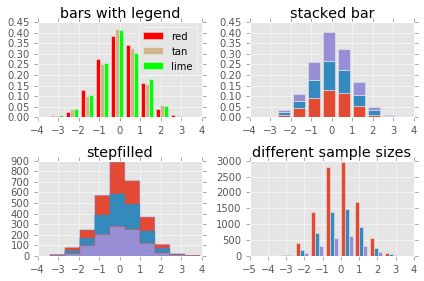

In [44]:
n_bins = 10
x = np.random.randn(1000, 3)

plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=True)
ax2.set_title('stepfilled')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

plt.tight_layout()

### Scatter plots

In [45]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


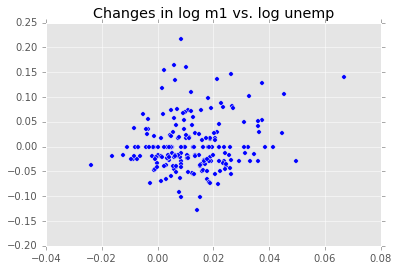

In [46]:
plt.figure()
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

pandas has a scatter_matrix function for creating "pairs plot or scatter plot matrix" from a DataFrame. It also supports placing **histograms or density plots of each variable along the diagonal**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014B27438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000025A57E80>]], dtype=object)

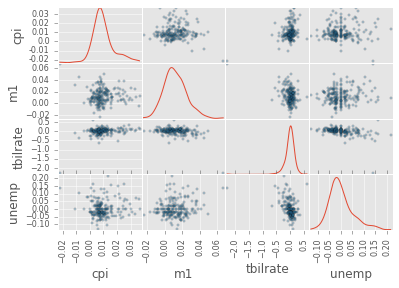

In [47]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [48]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 308.8+ KB


In [49]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [50]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [51]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [52]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [53]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [54]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [55]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [56]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [57]:
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [58]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [59]:
data.ix[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 167.3 KB


In [60]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

ImportError: No module named basemap

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [ ]:
make_plot()

In [ ]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')